<a href="https://colab.research.google.com/github/RafalDoroz/ai/blob/main/zbalansowanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

In [26]:
# Wczytanie zbioru danych Iris
data = load_iris()
X, y = data.data, data.target

In [27]:
# Sztuczne stworzenie niezbalansowanego zbioru danych (np. przez usunięcie części danych klasy 2)
indices_class_0 = np.where(y == 0)[0]
indices_class_1 = np.where(y == 1)[0]
indices_class_2 = np.where(y == 2)[0][:25]  # Zmniejszamy liczbę próbek dla klasy 2


In [28]:

# Nowy, niezbalansowany zbiór danych
X_unbalanced = np.vstack((X[indices_class_0], X[indices_class_1], X[indices_class_2]))
y_unbalanced = np.hstack((y[indices_class_0], y[indices_class_1], y[indices_class_2]))



In [29]:
# Podział na dane uczące i testowe
X_train, X_test, y_train, y_test = train_test_split(X_unbalanced, y_unbalanced, test_size=0.2, random_state=42)



In [30]:
# Klasyfikacja bez zbalansowania
clf_unbalanced = LogisticRegression(max_iter=200)
clf_unbalanced.fit(X_train, y_train)
y_pred_unbalanced = clf_unbalanced.predict(X_test)
accuracy_unbalanced = accuracy_score(y_test, y_pred_unbalanced)



In [31]:
# Zbalansowanie danych przez oversampling
oversampler = RandomOverSampler(random_state=42)
X_balanced, y_balanced = oversampler.fit_resample(X_train, y_train)



In [32]:
# Klasyfikacja po zbalansowaniu
clf_balanced = LogisticRegression(max_iter=200)
clf_balanced.fit(X_balanced, y_balanced)
y_pred_balanced = clf_balanced.predict(X_test)
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)



In [33]:
# Wyniki
print("Dokładność bez zbalansowania:", accuracy_unbalanced)
print("Dokładność po zbalansowaniu:", accuracy_balanced)



Dokładność bez zbalansowania: 0.96
Dokładność po zbalansowaniu: 1.0


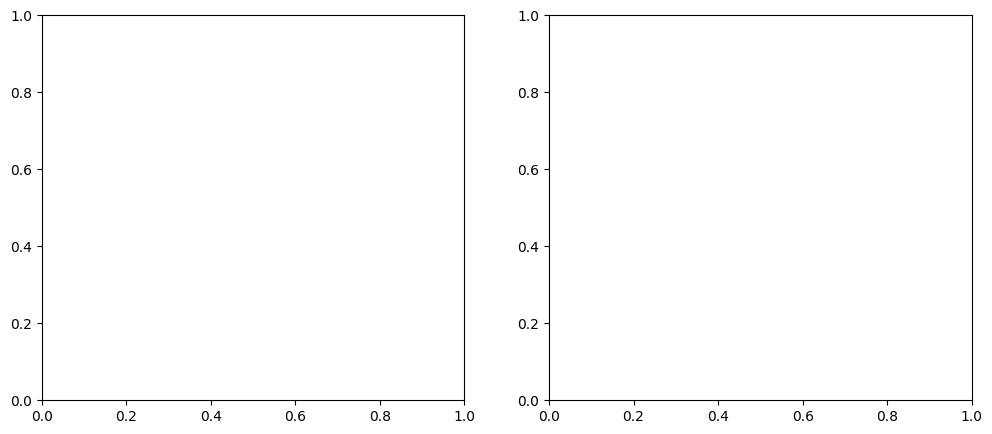

In [34]:
# Wizualizacja rozkładu klas przed i po zbalansowaniu
fig, axes = plt.subplots(1, 2, figsize=(12, 5))



In [35]:
# Przed zbalansowaniem
pd.Series(y_train).value_counts().plot(kind="bar", ax=axes[0], title="Rozkład klas przed zbalansowaniem")
axes[0].set_xlabel("Klasa")
axes[0].set_ylabel("Liczba próbek")



Text(4.444444444444466, 0.5, 'Liczba próbek')

In [36]:
# Po zbalansowaniu
pd.Series(y_balanced).value_counts().plot(kind="bar", ax=axes[1], title="Rozkład klas po zbalansowaniu")
axes[1].set_xlabel("Klasa")
axes[1].set_ylabel("Liczba próbek")

plt.show()